In [1]:
import pandas as pd
from textblob import TextBlob
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
pip install text2emotion

In [60]:
import text2emotion as te

In [4]:
xyz = pd.read_csv('../input/twintandtweepydata/newDataset-twint-and-tweepy.csv')
xyz.head()

In [5]:
xyz['polarity'] = xyz.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
xyz['subjectivity'] = xyz.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’)

In [6]:
xyz.head()

In [7]:
# assign tweets with polarity > 0 as positive sentiment
# polarity < 0 negative sentiment
xyz['sentiment'] = xyz['polarity'].apply(lambda polarity : +1 if polarity > 0 else 0)

In [11]:
xyz.head()

In [13]:
xyz.drop(['polarity','subjectivity'], inplace=True, axis=1)
xyz.head(10)

In [14]:
# split df - positive and negative sentiment:
positive = xyz[xyz['sentiment'] == 1]
negative = xyz[xyz['sentiment'] == 0]

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"])
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.text)
wordcloud2 = WordCloud(background_color = '#004481',colormap='Pastel1'
                      ,collocations=False,stopwords=STOPWORDS,
                      width=800, height=500, random_state=21).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

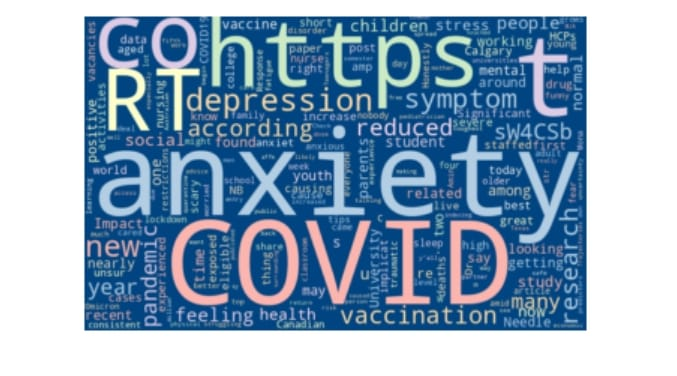

In [17]:
# xyz['sentimentt'] = xyz['sentiment'].replace({-1 : 'negative'})
# xyz['sentimentt'] = xyz['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(xyz, x="sentiment")
fig.update_traces(marker_color="#a2c9f4",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Tweet Sentiment: Covid repurcussions and Mental Health')
fig.show()

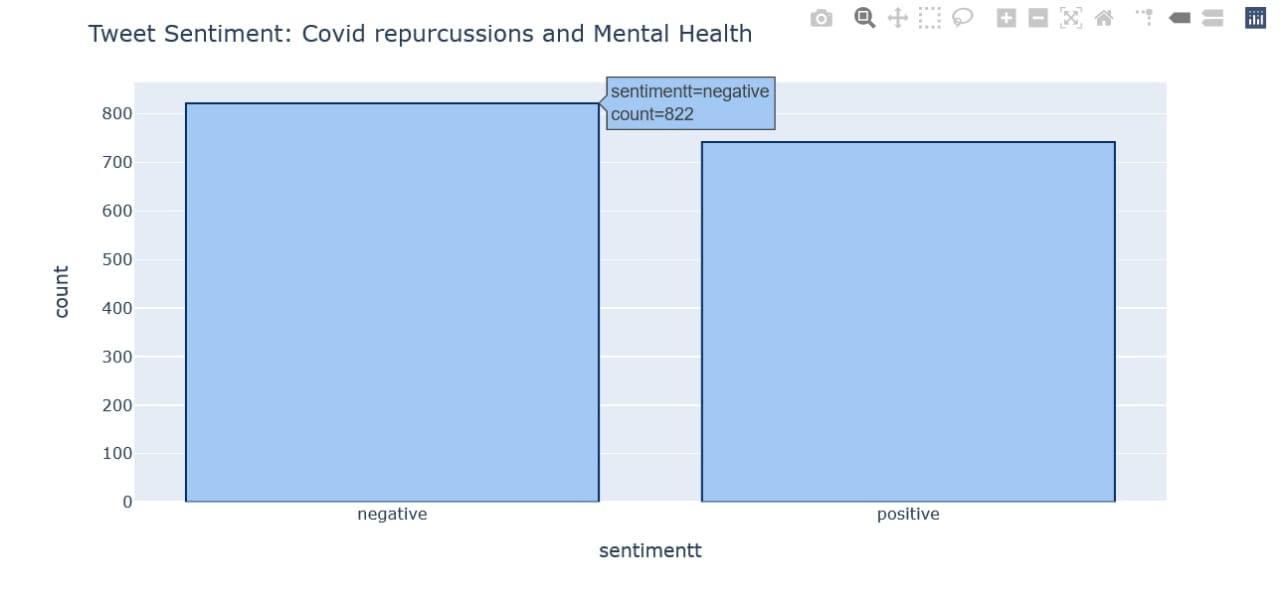

*****ANALYSIS USING BERT*****

In [18]:
xyz.describe()

In [19]:
xyz.head()

In [20]:
xyz.sentiment.unique()

In [21]:
xyz['sentiment'].value_counts()

In [22]:
xyz = xyz.sample(frac = 1)
xyz.head()

In [23]:
from sklearn.utils import shuffle

In [24]:
shuffled = shuffle(xyz, random_state=0)
train,eva = train_test_split(shuffled,test_size = 0.2)

In [25]:
eva.head

In [26]:
train.head

In [27]:
!pip install simpletransformers

In [28]:
from simpletransformers.classification import ClassificationModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=2, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

In [ ]:
# def making_label(st):
#     if(st==0):
#         return 0
#     else:
#         return 1
    
# train['label'] = train['sentiment'].apply(making_label)
# eva['label'] = eva['sentiment'].apply(making_label)

In [29]:
print(train.shape)

In [30]:
columns_titles = ["text","sentiment"]
dtrain=train.reindex(columns=columns_titles)

In [31]:
train.head()

In [32]:
train.sentiment.unique()

In [33]:
eva.sentiment.unique()

In [34]:
eva.head()

In [35]:


train_df = pd.DataFrame({
    'text': train['text'][:1500].replace(r'\n', ' ', regex=True),
    'sentiment': train['sentiment'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['text'][-1000:].replace(r'\n', ' ', regex=True),
    'sentiment': eva['sentiment'][-1000:]
})



In [36]:
model.train_model(train_df)

In [37]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

In [38]:
result

In [39]:
model_outputs

In [40]:
import numpy as np

In [41]:


lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))



In [42]:
true = eval_df['sentiment'].tolist()
predicted = lst
print(true)

In [43]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

In [44]:
import pandas as pd
y_true = pd.Series([0,1])
y_pred = pd.Series([0,1])

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [45]:
df_cm = pd.DataFrame(mat, range(2), range(2))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [46]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','negative'])

In [47]:
sklearn.metrics.accuracy_score(true,predicted)

82% accuracy

**Your statement**

In [52]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'negative',1:'positive'}
    print(sentiment_dict[pos])
    return

In [53]:
statement1 ="covid is a really bad thing for us"
get_result(statement1)
te.get_emotion(statement1)

In [57]:
statement2= "i am so happy now that things are back to normal"
get_result(statement2)
te.get_emotion(statement2)

**Detect a language of a Tweet in different Language**

In [66]:
statement3 ="Je n'aime pas ce covid et ce confinement"
blob = TextBlob(statement3)
blob.detect_language()

**Translate it back to English**

In [67]:
blob.translate(from_lang='fr', to ='en')

**Check the spellings in out Tweet**

In [68]:
blob.words[1].spellcheck()